Dijkstra’s algorithm is used to find the shortest path between a source node and all other nodes in a weighted graph. This algorithm works by initialising all nodes to infinity, except for the source node. This is set to 0. It then iteratively selects the node with the smallest distance from the unvisited nodes and updates the distances of its neigboring nodes if a shorted path is found. This process is repeated until all nodes have been visited. The shortest distance is returned.    

In [1]:
import math
import networkx as nx
import matplotlib.pyplot as plt
from random import seed, randint

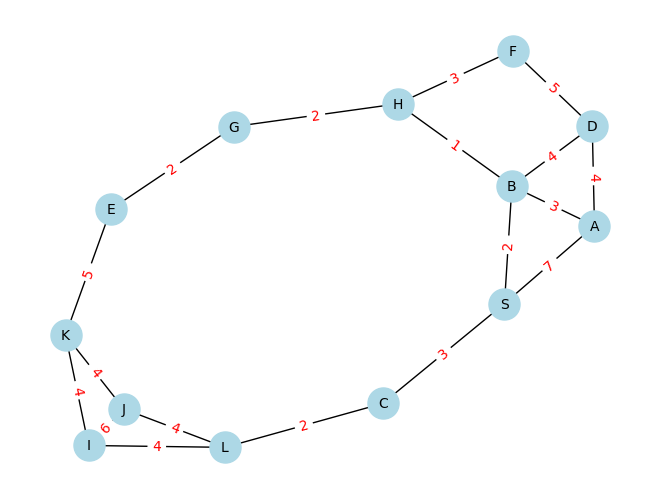

In [3]:
g = nx.Graph()
g.add_edges_from([
    ('S', 'A', {'d': 7}),
    ('S', 'B', {'d': 2}),
    ('S', 'C', {'d': 3}),
    ('A', 'B', {'d': 3}),
    ('A', 'D', {'d': 4}),
    ('B', 'D', {'d': 4}),
    ('B', 'H', {'d': 1}),
    ('C', 'L', {'d': 2}),
    ('D', 'F', {'d': 5}),
    ('H', 'F', {'d': 3}),
    ('H', 'G', {'d': 2}),
    ('G', 'E', {'d': 2}),
    ('L', 'I', {'d': 4}),
    ('L', 'J', {'d': 4}),
    ('I', 'J', {'d': 6}),
    ('I', 'K', {'d': 4}),
    ('J', 'K', {'d': 4}),
    ('E', 'K', {'d': 5}),
])
edge_labels = {(u, v): d['d'] for u, v, d in g.edges(data=True)}

# Visualize the graph
pos = nx.spring_layout(g)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_color='red')

plt.show()

In [30]:
def min_distance(distances, visited):
    # Initialize minimum distance for next node
    min_val = float('inf')
    min_index = -1
    
    # Loop through all nodes to find minimum distance
    for i in range(len(distances)):
        if distances[i] < min_val and i not in visited:
            min_val = distances[i]
            min_index = i
            
    return min_index

In [33]:
def dijkstra(graph, source):
    # Get total number of nodes
    total_nodes = len(graph)
    
    # Initialize distance 
    distances = [float('inf')] * total_nodes
    
    # Set starting node to 0
    visited = []
    distances[source] = 0
    
    
    # Loop through nodes to find shortest path to each node
    for i in range(total_nodes):
        
        # Find minimum distance node that has not been visited yet
        current_node = min_distance(distances, visited)
        
        # Add current_node to list of visited nodes
        visited.append(current_node)
        
        # Loop through neighboring nodes of curent_nodes
        for j in range(total_nodes):
            # Check if there is an edge from current_node to neighbor
            if graph[current_node][j] != 0:
                # Calculate the distance from start_node to neighbor
                new_distance = distances[current_node] + graph[current_node][j]
                
                # Update the distance if it is less than previous recorded value 
                if new_distance < distances[j]:
                    distances[j] = new_distance
                    
    return distances   

In [40]:
def dijkstra(graph, source):
    # Get number of nodes
    n = len(graph)
    
    # Initialize visited, weights and path list
    visited = [False]*n
    weights = [math.inf]*n
    path = [None]*n
    
    # Set source weight to 0
    weights[source] = 0
    
    while True:
        min_weight = math.inf
        u = -1
    
        # Find the node with the minimum weight among the unvisited nodes
        for i in range(n):
            if not visited[i] and weights[i] < min_weight:
                min_weight = weights[i]
                
                u = i
        if u == -1:
            break       
            
        visited[u] = True

        for v, w in G[u]:
            if not visited[v]:
                f = weights[u] + w
                if f < weights[v]:
                    weights[v] = f
                    path[v] = u

    return path, weights

In [4]:
def Dijkstra(graph,source):
    
        visited = []
        unvisited = list(graph.nodes)
        dijkstra_dict = {}
        current_vertex = source
        g = graph.copy()

        # Setting up the dictionary for storing factors
        for node in g.nodes:

            if node == source:
                dijkstra_dict[node]=[0, ' ']

            else:
                dijkstra_dict[node]= [float('inf'), ' ']

        # Iterate while unvisisted nodes contains nodes
        while len(unvisited) != 0: 
            assistant = 0
            assistant_vertex = ''

            # For each neighbor in the current vertex find its weight
            for (u, v) in g.edges(current_vertex):
                weight = g.edges[(u, v)]['weight'] + dijkstra_dict[u][0]

                # If the weight is smaller than the previous one replace it 
                if weight < dijkstra_dict[v][0]:
                    dijkstra_dict[v][0] = weight
                    dijkstra_dict[v][1] = u

            # Add current node to visited list remove from unvisited
            visited.append(current_vertex)
            unvisited.remove(current_vertex)

            # Find the next current node
            for node in unvisited:
                if assistant == 0 or assistant > dijkstra_dict[node][0]:
                    assistant = dijkstra_dict[node][0]
                    assistant_vertex = node

            # Correct the graph and assign the next node
            g.remove_node(current_vertex) 
            current_vertex = assistant_vertex     
        
        return dijkstra_dict
            

In [5]:
print(Dijkstra(g,'A'))

KeyError: 'weight'